In [2]:
import numpy as np
import pyaudio
import time
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras.models import load_model


In [3]:
def preprocessDataForNN(img_arr): 
    
    img_norm = img_arr/255
    img_size = img_norm.resize((150, 150, 3))
    img_compl = img_norm.reshape(-1, 150, 150, 3)
    
    return img_compl

In [4]:
def create_spectrogram(y, sample_rate):
    
    plt.interactive(False)
        
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max))

    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')

    del sample_rate,fig,ax
    
    return spectrogram
    

In [11]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 1

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

CHUNK = 1024
FORMAT = pyaudio.paFloat32
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 1.5
#WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

model = load_model('/home/aigaf/Downloads/Telegram Desktop/save_1.h5')

while(True):  
    frames = []  
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.extend(data)
    
    #print("* done recording")

    frames = bytes(frames)

    numpy_array = np.frombuffer(frames, dtype=np.float32)
    sp = create_spectrogram(numpy_array, RATE)
    img_compl = preprocessDataForNN(sp)
    final_res = model.predict(img_compl)
    print(final_res)
    #print(sp)

# numpy_array = np.frombuffer(pull, dtype=np.float32)
# sp = create_spectrogram(numpy_array, RATE)
# print(sp)

#stream.stop_stream()
##stream.close()
p.terminate()

* recording
* recording
* done recording
[[0.01024798 0.99001646]]
* done recording
[[0.01024625 0.9900182 ]]
* done recording
[[0.01024801 0.99001634]]
* done recording
[[0.01024812 0.9900163 ]]
* done recording
[[0.00977489 0.9904865 ]]
* done recording
[[8.8918209e-04 9.9924755e-01]]
* done recording
[[0.01012743 0.9901378 ]]
* done recording
[[0.00977364 0.9904846 ]]
* done recording
[[0.01009974 0.9901644 ]]
* done recording
[[0.01024386 0.9900204 ]]
* done recording
[[0.00831437 0.9919326 ]]
* done recording
[[0.010003  0.9902594]]
* done recording
[[0.0102483 0.9900161]]
* done recording
[[0.01024711 0.9900173 ]]
* done recording
[[0.00746778 0.9928165 ]]
* done recording
[[0.00932312 0.99093604]]
* done recording
[[0.01013616 0.9901278 ]]
* done recording
[[0.01024085 0.9900234 ]]
* done recording
[[0.01024756 0.9900167 ]]
* done recording
[[0.01024753 0.99001694]]
* done recording
[[0.01024801 0.9900164 ]]
* done recording
[[0.01018789 0.99007726]]
* done recording
[[0.0101638

KeyboardInterrupt: 

In [94]:
print(sp)

[[7.99958055e-09 4.06708896e-05 5.69059746e-04 ... 2.41090152e-02
  8.14658254e-02 1.76965415e-01]
 [1.07594211e-09 2.46012078e-05 2.79297703e-04 ... 7.37282932e-02
  1.98449671e-01 1.32958502e-01]
 [6.36899478e-10 8.71320572e-06 3.15429206e-05 ... 1.35282886e+00
  4.13963079e+00 5.75189686e+00]
 ...
 [5.91894933e-09 9.98335103e-09 1.77671300e-08 ... 2.92862996e-08
  3.76490959e-07 1.41993314e-06]
 [5.85461191e-09 1.27147084e-08 1.91224192e-08 ... 1.06641291e-08
  3.54731299e-07 1.36834899e-06]
 [8.73906369e-09 1.22732855e-08 1.39447360e-08 ... 9.87871918e-09
  3.49344731e-07 1.36199469e-06]]


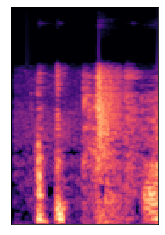

In [96]:
from matplotlib import pyplot as plt 
plt.imshow(sp, interpolation='nearest') 
plt.show() 
librosa.display.specshow(librosa.power_to_db(sp, ref=np.max))